# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
print(type(CCTV_Seoul))
CCTV_Seoul.head()

<class 'pandas.core.frame.DataFrame'>


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [10]:
!pip install numpy

In [11]:
import pandas as pd
import numpy as np

In [12]:
s = pd.Series([1,3,5,np.nan,6,8])
print(type(s))
s

<class 'pandas.core.series.Series'>


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
dates = pd.date_range('20200804', periods=6)
dates

DatetimeIndex(['2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-08', '2020-08-09'],
              dtype='datetime64[ns]', freq='D')

In [14]:
a = np.random.randn(6,4)
a

array([[-1.54062364,  1.49424463,  2.0751946 ,  0.40480247],
       [ 1.34506459, -0.79741861, -0.25401339, -1.03073186],
       [-0.76679208, -1.34497556,  0.70511136,  0.9305241 ],
       [-0.16611167, -1.5472897 ,  0.82075069,  1.30118283],
       [-0.92247804, -0.34975277,  0.30713928, -0.16505915],
       [ 1.27924804,  0.74486193,  1.44044404,  0.1145164 ]])

In [15]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [16]:
df.head()

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466


In [17]:
df.head(3)

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949


In [18]:
df.index

DatetimeIndex(['2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-08', '2020-08-09'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 0.27044073, -0.24518747,  0.41710814,  0.01067709],
       [-0.27711431, -0.56565369,  0.46425176,  1.50496028],
       [-0.99507313, -0.10224988, -0.12966306, -0.19094897],
       [ 1.0165623 , -0.11794816,  0.80418362, -0.77779027],
       [-1.24824087, -0.17070905,  0.64124026, -0.44146558],
       [ 1.04582312, -0.71678274,  1.31491106,  0.78173806]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-08-04 to 2020-08-09
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.031267,-0.319755,0.585339,0.147862
std,0.981783,0.258421,0.476966,0.846317
min,-1.248241,-0.716783,-0.129663,-0.777790
25%,-0.815583,-0.485537,0.428894,-0.378836
50%,-0.003337,-0.207948,0.552746,-0.090136
75%,0.830032,-0.131138,0.763448,0.588973
max,1.045823,-0.102250,1.314911,1.504960


In [23]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [24]:
df

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [25]:
df['A']

2020-08-04    0.270441
2020-08-05   -0.277114
2020-08-06   -0.995073
2020-08-07    1.016562
2020-08-08   -1.248241
2020-08-09    1.045823
Freq: D, Name: A, dtype: float64

In [27]:
df[0:3]

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949


In [30]:
print(df)
df['20200804':'20200806']

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949


In [32]:
dates = pd.date_range('20200804', periods=6)
print(dates)
print(df)
df.loc[dates[0]]

DatetimeIndex(['2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-08', '2020-08-09'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


A    0.270441
B   -0.245187
C    0.417108
D    0.010677
Name: 2020-08-04 00:00:00, dtype: float64

In [33]:
print(df)
df.loc[:,['A','B']]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,B
2020-08-04,0.270441,-0.245187
2020-08-05,-0.277114,-0.565654
2020-08-06,-0.995073,-0.102250
2020-08-07,1.016562,-0.117948
2020-08-08,-1.248241,-0.170709
2020-08-09,1.045823,-0.716783


In [34]:
df.loc['20200804':'20200806',['A','B']]

,A,B
2020-08-04,0.270441,-0.245187
2020-08-05,-0.277114,-0.565654
2020-08-06,-0.995073,-0.102250


In [36]:
df.loc['20200806',['A','B']]

A   -0.995073
B   -0.102250
Name: 2020-08-06 00:00:00, dtype: float64

In [37]:
df.loc[dates[0],'A']

0.27044072747574277

In [38]:
print(df)
df.iloc[3]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


A    1.016562
B   -0.117948
C    0.804184
D   -0.777790
Name: 2020-08-07 00:00:00, dtype: float64

In [39]:
print(df)
df.iloc[3:5,0:2]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,B
2020-08-07,1.016562,-0.117948
2020-08-08,-1.248241,-0.170709


In [40]:
print(df)
df.iloc[[1,2,4],[0,2]]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,C
2020-08-05,-0.277114,0.464252
2020-08-06,-0.995073,-0.129663
2020-08-08,-1.248241,0.641240


In [41]:
print(df)
df.iloc[1:3,:]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,B,C,D
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949


In [42]:
print(df)
df.iloc[:,1:3]

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,B,C
2020-08-04,-0.245187,0.417108
2020-08-05,-0.565654,0.464252
2020-08-06,-0.102250,-0.129663
2020-08-07,-0.117948,0.804184
2020-08-08,-0.170709,0.641240
2020-08-09,-0.716783,1.314911


In [43]:
df

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [44]:
df[df.A > 0]

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [45]:
df[df > 0]

,A,B,C,D
2020-08-04,0.270441,NaN,0.417108,0.010677
2020-08-05,NaN,NaN,0.464252,1.504960
2020-08-06,NaN,NaN,NaN,NaN
2020-08-07,1.016562,NaN,0.804184,NaN
2020-08-08,NaN,NaN,0.641240,NaN
2020-08-09,1.045823,NaN,1.314911,0.781738


In [46]:
df2 = df.copy()

In [47]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2020-08-04,0.270441,-0.245187,0.417108,0.010677,one
2020-08-05,-0.277114,-0.565654,0.464252,1.504960,one
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949,two
2020-08-07,1.016562,-0.117948,0.804184,-0.777790,three
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466,four
2020-08-09,1.045823,-0.716783,1.314911,0.781738,three


In [48]:
df2['E'].isin(['two','four'])

2020-08-04    False
2020-08-05    False
2020-08-06     True
2020-08-07    False
2020-08-08     True
2020-08-09    False
Freq: D, Name: E, dtype: bool

In [49]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949,two
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466,four


In [50]:
df

,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.277114,-0.565654,0.464252,1.504960
2020-08-06,-0.995073,-0.102250,-0.129663,-0.190949
2020-08-07,1.016562,-0.117948,0.804184,-0.777790
2020-08-08,-1.248241,-0.170709,0.641240,-0.441466
2020-08-09,1.045823,-0.716783,1.314911,0.781738


In [51]:
print(df)
df.apply(np.cumsum)

                   A         B         C         D
2020-08-04  0.270441 -0.245187  0.417108  0.010677
2020-08-05 -0.277114 -0.565654  0.464252  1.504960
2020-08-06 -0.995073 -0.102250 -0.129663 -0.190949
2020-08-07  1.016562 -0.117948  0.804184 -0.777790
2020-08-08 -1.248241 -0.170709  0.641240 -0.441466
2020-08-09  1.045823 -0.716783  1.314911  0.781738


,A,B,C,D
2020-08-04,0.270441,-0.245187,0.417108,0.010677
2020-08-05,-0.006674,-0.810841,0.881360,1.515637
2020-08-06,-1.001747,-0.913091,0.751697,1.324688
2020-08-07,0.014816,-1.031039,1.555880,0.546898
2020-08-08,-1.233425,-1.201748,2.197121,0.105433
2020-08-09,-0.187602,-1.918531,3.512032,0.887171


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.294064
B    0.614533
C    1.444574
D    2.282751
dtype: float64

# 4. CCTV 데이터 파악하기

In [55]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [57]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [58]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [59]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [66]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [69]:
#pop_Seoul.drop([0], inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [70]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [71]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [73]:
# pop_Seoul.drop([26], inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [74]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [75]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [76]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [77]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [78]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [79]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [81]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [82]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [83]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [84]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [85]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [86]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [87]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [88]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [89]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [90]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [91]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [92]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [99]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [100]:
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [101]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [112]:
print(df1)
print(df4)
# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result = pd.concat([df1, df4.reindex(index=df1.index)], axis=1)

result

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [109]:
print(df1)
print(df4)
result = pd.concat([df1, df4], ignore_index=True)
result

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [115]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [116]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [117]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [118]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [119]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [120]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [122]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [123]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [124]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [126]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

KeyError: '2013년도 이전'

In [127]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [90]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [91]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [92]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [93]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [94]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. 그래프 그리기 기초 - matplotlib

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

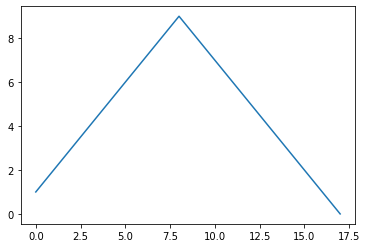

In [130]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [145]:
import numpy as np

t = np.arange(0,12,0.01)
# print(len(t))
y = np.sin(t)

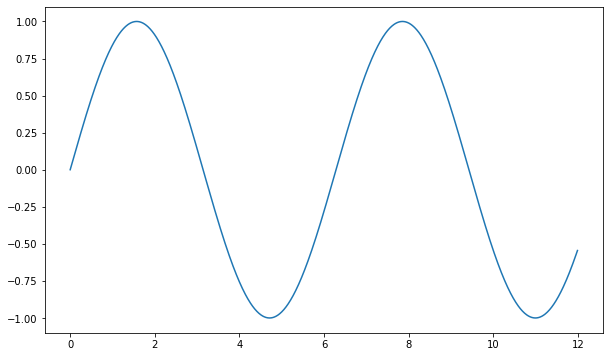

In [146]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

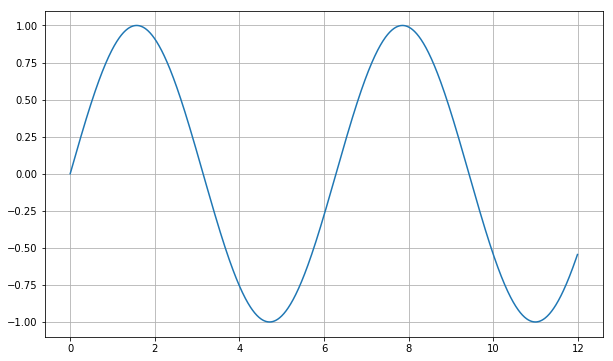

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

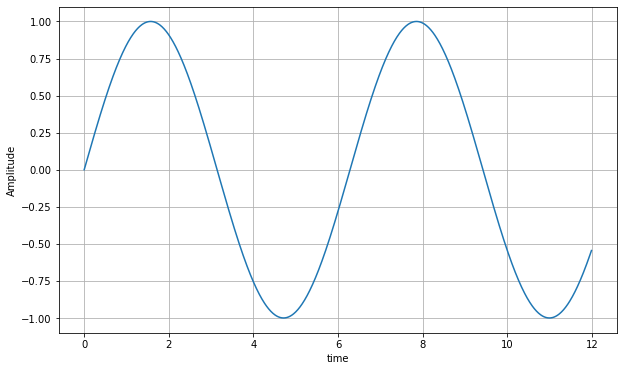

In [147]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

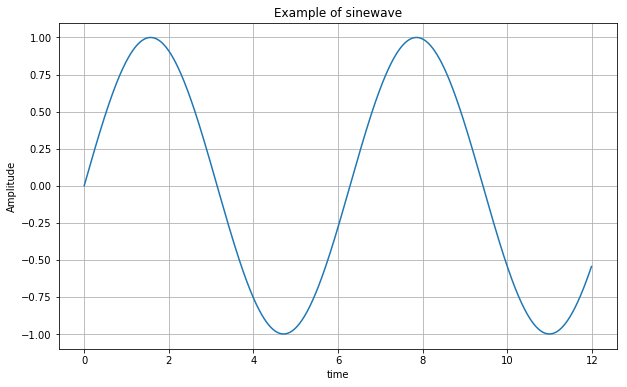

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

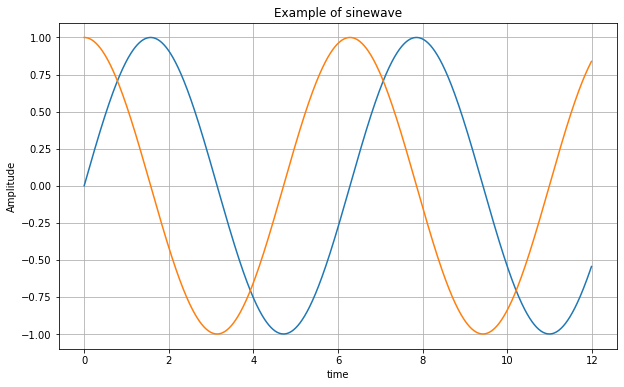

In [148]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

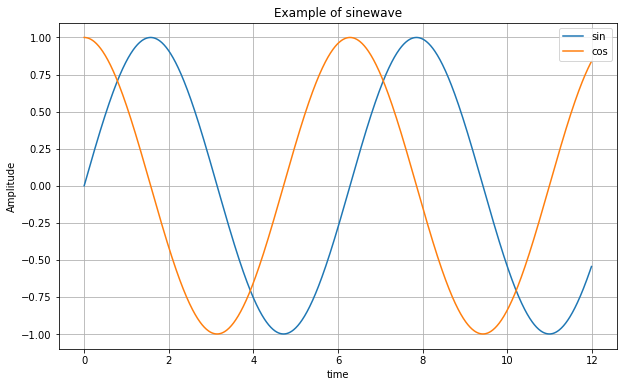

In [149]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

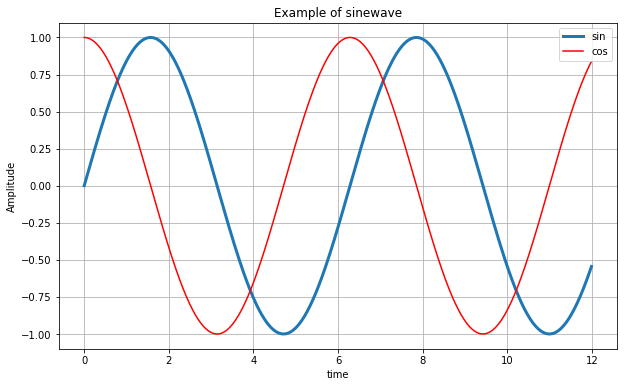

In [151]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

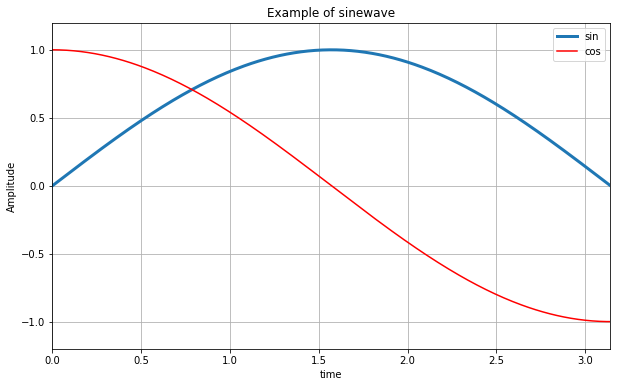

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

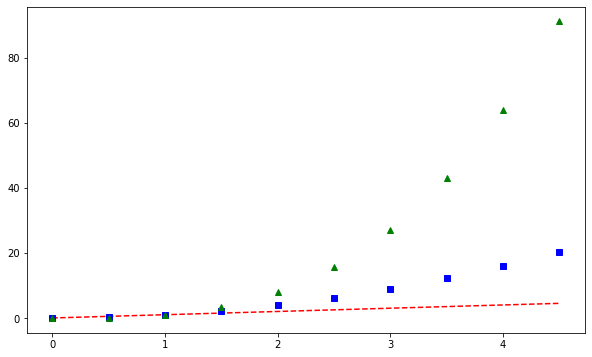

In [152]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

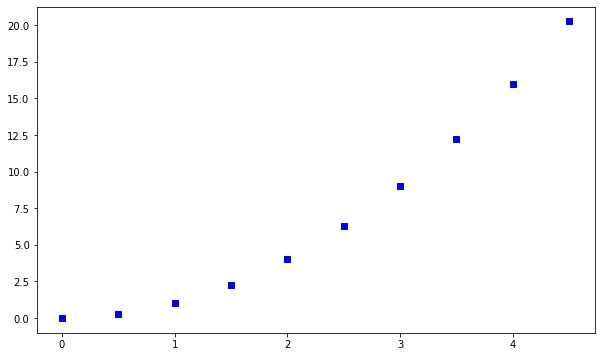

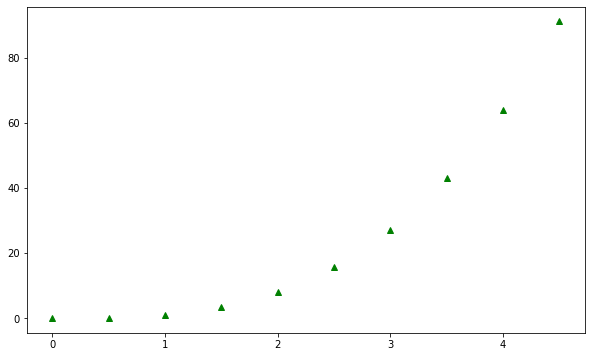

In [153]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

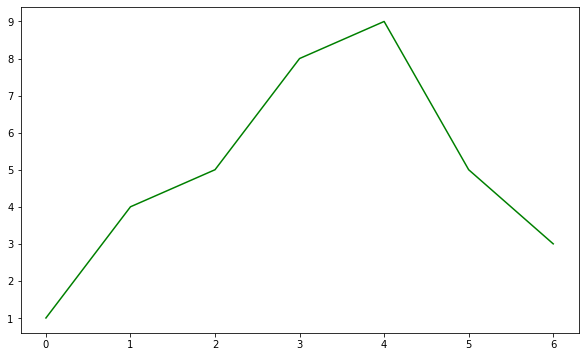

In [154]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

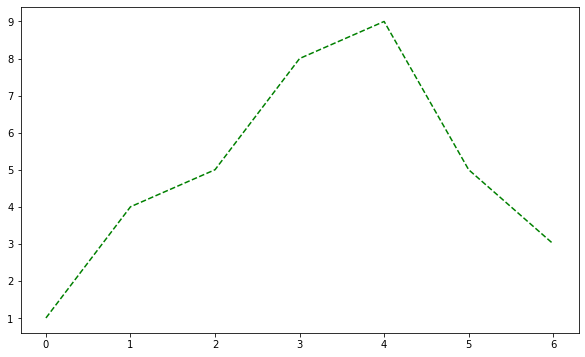

In [155]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

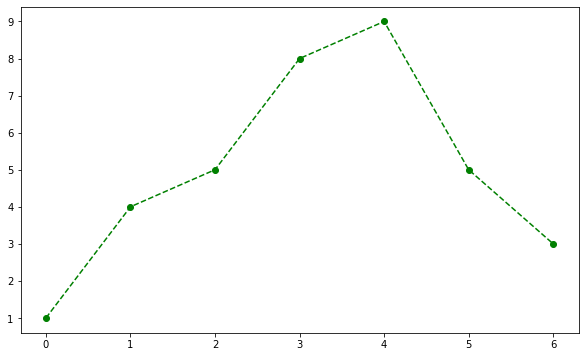

In [158]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

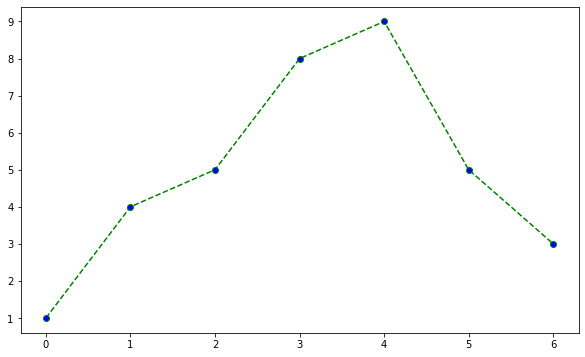

In [159]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

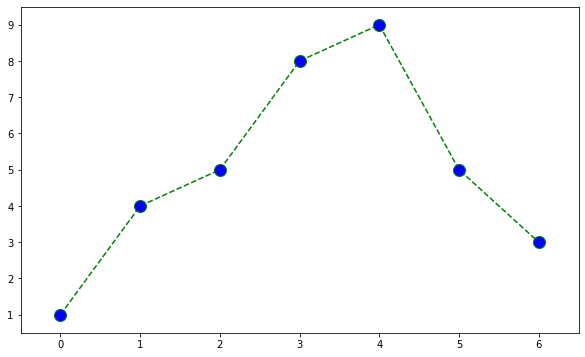

In [160]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [161]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

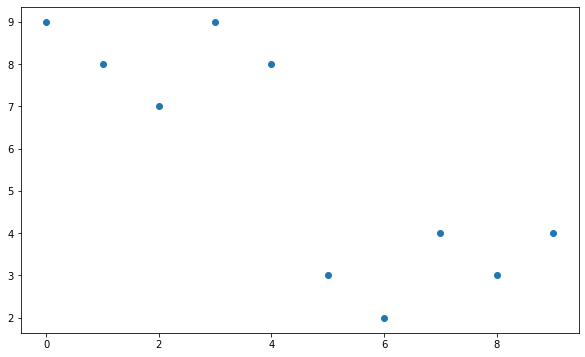

In [162]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

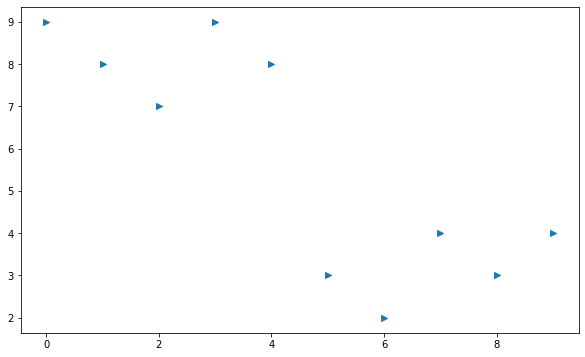

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

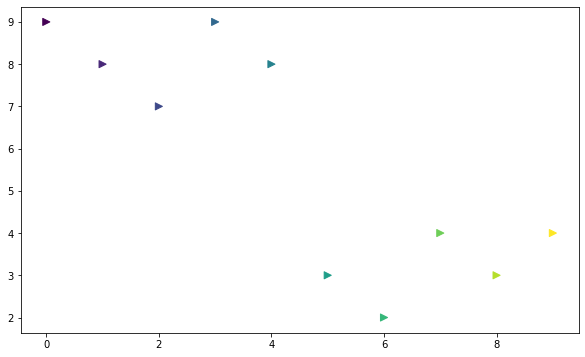

In [164]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

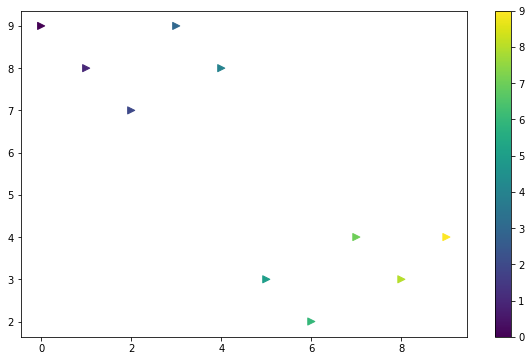

In [165]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [166]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
print(s1)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

[-7.28273761e-01  1.64888435e+00 -5.43149187e-01 -1.08484704e+00
  8.88411186e-01  1.42382787e+00  1.02788992e+00  9.33887331e-01
  8.57702410e-01 -1.31732166e+00 -5.72291742e-01 -6.36867418e-01
 -1.57763309e-01  1.44569197e-01 -1.35255823e+00  8.40607575e-01
  1.34693840e+00 -6.09192498e-01  1.89627802e+00 -8.39792256e-02
 -1.19502745e+00 -1.67965354e+00 -1.91870388e-01 -5.23062622e-01
  7.78934840e-01 -8.91525700e-01  9.27692460e-02 -1.62870073e+00
  8.19443405e-01  6.54357914e-01  1.20257398e+00  2.86342188e-01
  1.97275450e-01  3.94910375e-01 -2.07816427e-02  3.67718851e-01
 -1.09483817e+00  1.45299816e+00  6.43084130e-02  3.08154940e-02
  1.07532395e+00 -1.55108555e+00  9.97580267e-01 -7.94597438e-01
  2.57649509e-01  4.11102039e-01  4.62743032e-01 -5.58395426e-01
  9.60799487e-01 -3.31621653e-01 -5.39940448e-01  7.62471490e-01
  2.61693769e-01 -1.05832430e+00  6.36296952e-01 -1.07826678e+00
  1.05749853e+00 -1.30223294e+00  9.74946770e-01 -1.34620140e+00
  3.85413925e-01 -4.69056

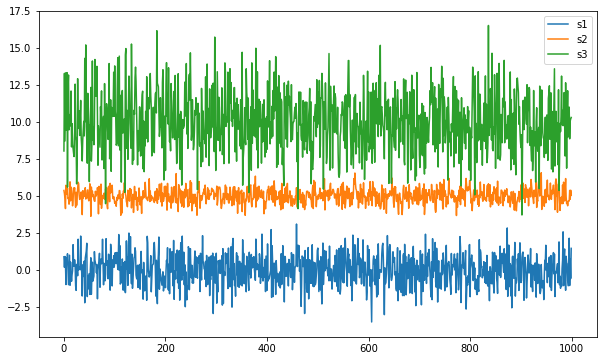

In [119]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

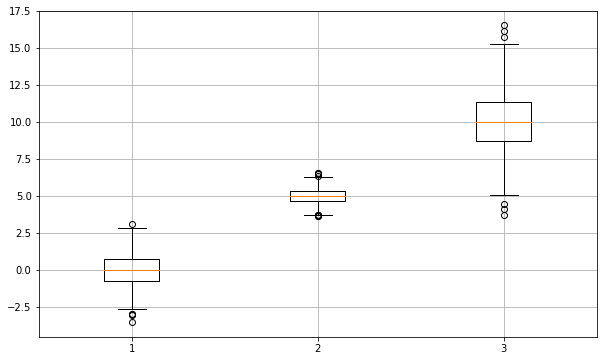

In [120]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

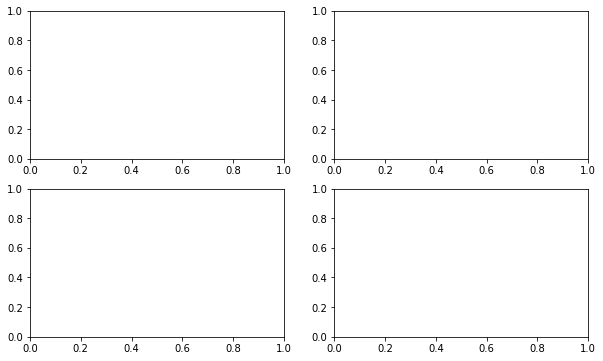

In [178]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.subplot(224)

plt.show()


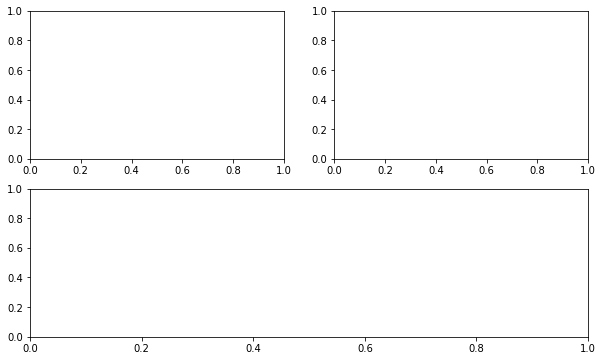

In [180]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

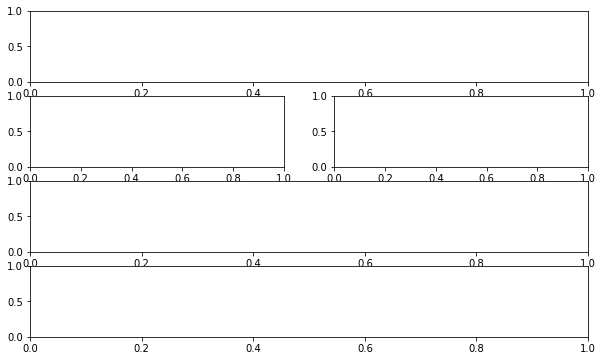

In [181]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

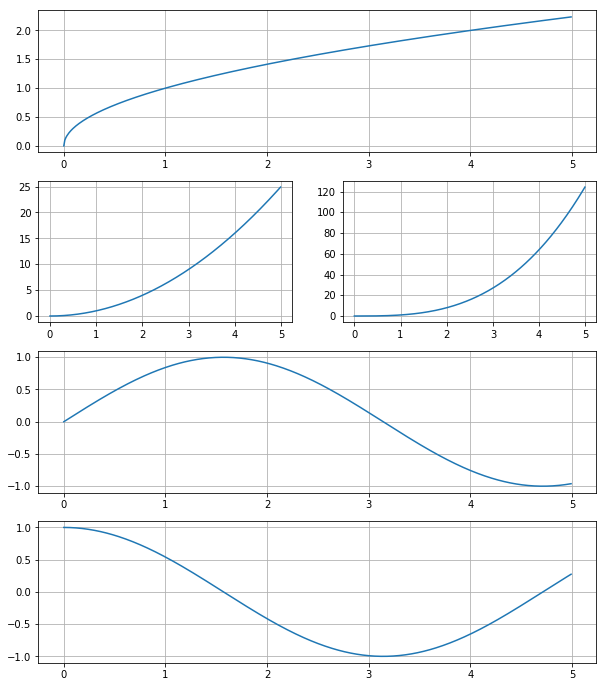

In [123]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [182]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [183]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


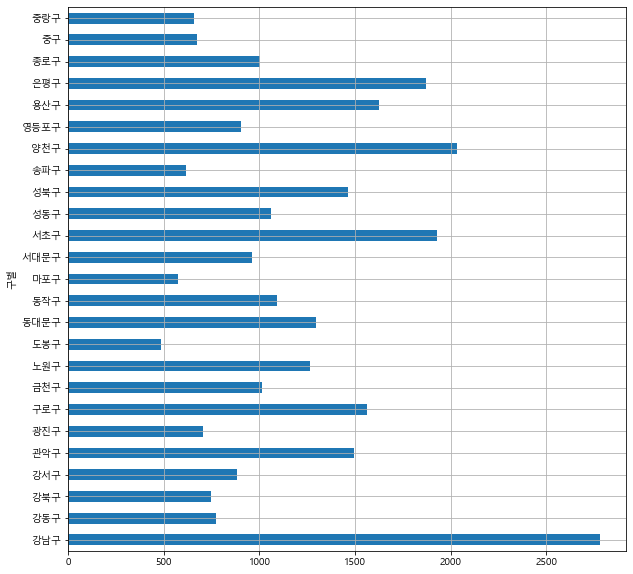

In [184]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

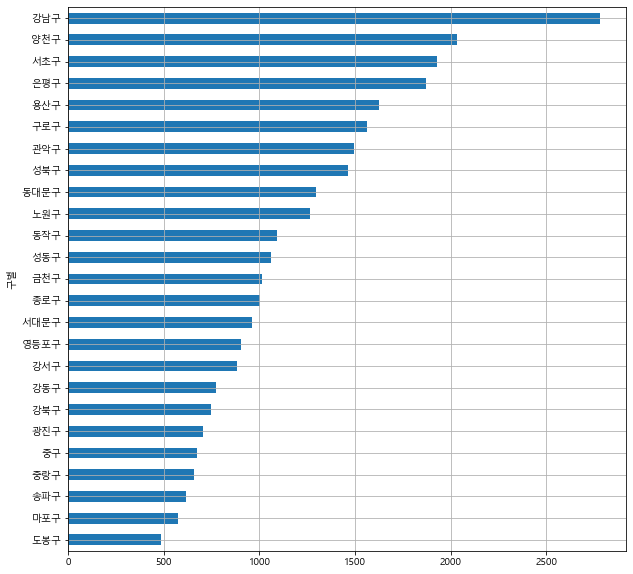

In [185]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

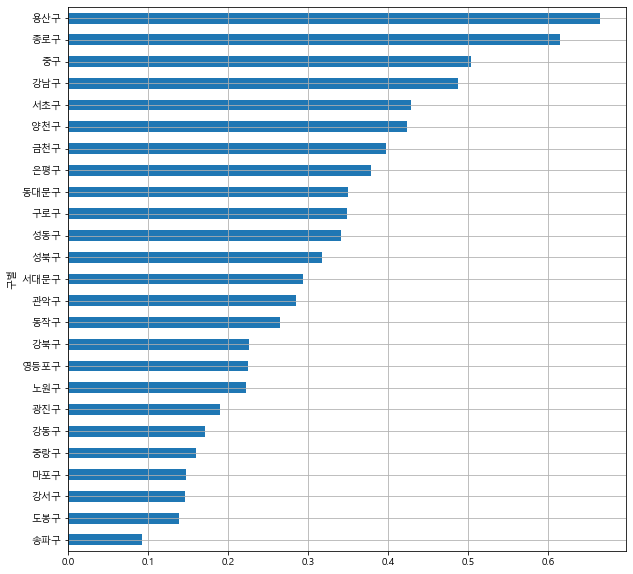

In [187]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

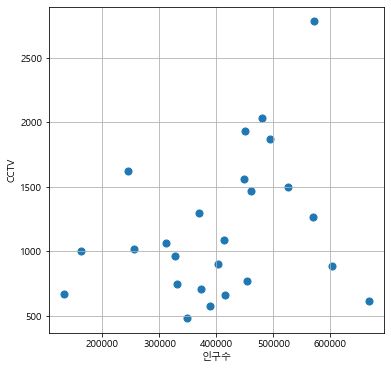

In [188]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### polyfit  함수의 사용

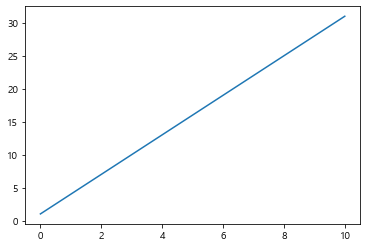

In [189]:
x = np.arange(0, 10, 0.01)
y = 3*x + 1
plt.plot(x,y)
plt.show()

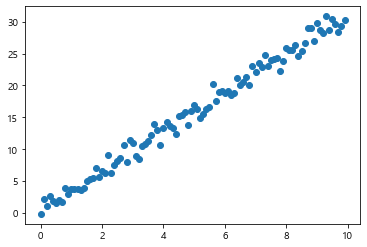

In [192]:
x = np.arange(0, 10, 0.1)
y = 3*x + 1
y_noise = y + np.random.randn(len(y))
plt.scatter(x,y_noise)
plt.show()

In [193]:
fp1 = np.polyfit(x, y_noise, 1)
fp1

array([3.06575534, 0.55136135])

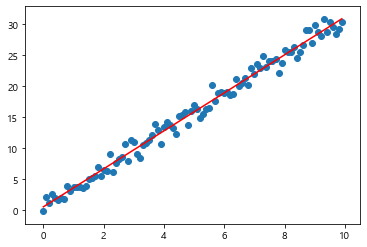

In [195]:
f1 = np.poly1d(fp1)
x = np.arange(0, 10, 0.1)
plt.plot(x,f1(x),"r")
plt.scatter(x,y_noise)
plt.show()

In [196]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [197]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

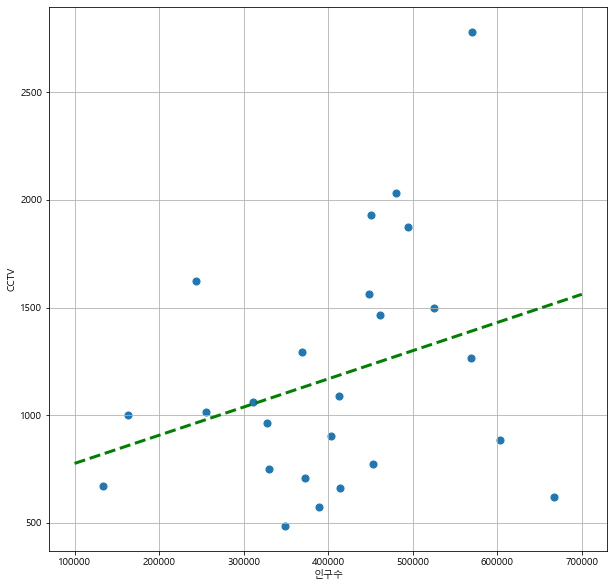

In [198]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [199]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


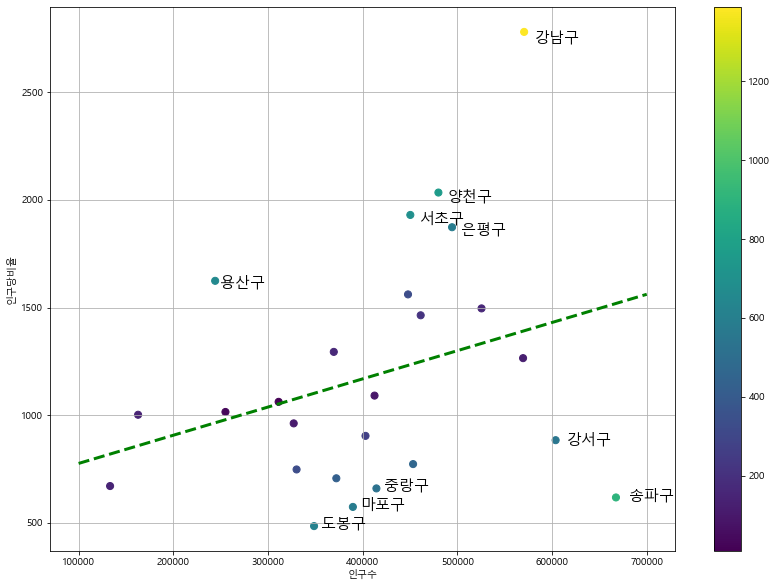

In [200]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다